# 1912년 타이타닉 사고 데이터 EDA
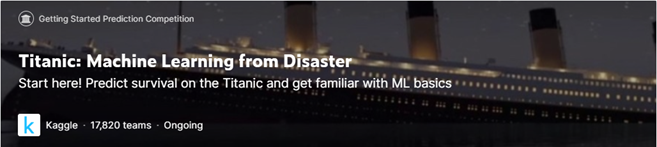
#### 탐색적 데이터 분석 (EDA)를 통해 아래 목표를 달성해봅시다 
- 주어진 각 feature들의 분포 살펴보기, 생존자/사망자 별로 데이터 분리하여 살펴보기
- 어떤 정보를 통해 **생존율을 예측**할 수 있을 지, 가설을 세우고 실제 그래프로 검증해봅시다.

### [ 데이터 설명 ]
- 891명의 승객에 대한 데이터.  생존여부 / 좌석 등급 / 성별 / 나이 / 일행 / 자녀 / 운임 등의 feature

|Feature|	Definition|	Value|
|------|---------|------------|
|survived|	생존 여부|	0 = No, 1 = Yes|
|pclass|	티겟 등급 (1등석, 2등석, 3등석)|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	성별	| male 남성,  female 여성
|age|	나이  |	((숫자))
|sibsp|	함께 탑승한 배우자, 형제자매의 수 합	|   ((숫자))
|parch|	함께 탑승한 부모님, 자녀의 수 합	|   ((숫자))
|fare|	운임 요금 (티켓 가격)	|   ((숫자))
|embarked|	출항지 (한글자)	|C = Cherbourg, Q = Queenstown, S = Southampton|
|class|	티켓 등급 (단어로)	|  First, Second, Third
|who|	남성/여성/아이 구분	|    man, woman, child
|adult_male|	성인 남성인지의 여부	|    True, False
|deck|	선박에서 배정받은 좌석의 구역	|    A, B, C, D, E, F, G, 빈 값
|embark_town|	출항지 (풀네임)	|   ((도시이름))
|alive|	생존 여부	|    yes, no
|alone|	혼자인지 여부	|    True, False

## 라이브러리 임포트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 출력을 위한 글꼴 설정

## 데이터 불러오기

In [2]:
titanic_df = sns.load_dataset('titanic')

In [4]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## EDA 탐색적 데이터 분석 수행하기

In [5]:
# .info() 함수로 데이터 컬럼별 타입(자료형), 값이 있는 행(Non-Null)의 갯수 등을 알 수 있습니다.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


범주형 컬럼과, 수치형 컬럼으로 나누어서 리스트를 만듭니다. (추후 분석 시 반복되는 코드를 줄일 수 있어요)  
* 범주형 데이터은 값이 [1, 2, 3], ["내부", "외부"]와 같이 몇 가지 분류로 한정되는 데이터 입니다.
* 수치형 데이터는 값이 1,2,3,5,..., 1.2, 4.51, 3.1415와 같이 숫자 축으로 무한히 위치할 수 있는 데이터 입니다.

In [11]:
#범주형 데이터 컬럼을 따로 리스트로 만든다 
category_cols = ["sex","embarked","class","who","adult_male","deck","embark_town","alive","alone"]
len(category_cols)

9

In [9]:
#수치형 데이터 컬럼을 따로 리스트로 만든다 
numerical_cols = ["age","sibsp","parch","fare"]

#### 데이터의 통계량 살펴보기  
.describe() 함수로 각 열에 대한 대략적인 통계 값들을 볼 수 있습니다. (평균, 상위 25/50/75% 값, 최대/최소 값 등)

In [47]:
#describe() 대략적인 통계값을 볼 수 있다
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
# .value_counts()를 통해 각 컬럼별로 몇 개의 row가 있는지 셀 수 있습니다
# count를 통해서 데이터의 특징을 파악 해 볼 수 있다.
for col in category_cols:
    print(col + " 카운트::")
    print(titanic_df.loc[:, col].value_counts())
    print()

sex 카운트::
male      577
female    314
Name: sex, dtype: int64

embarked 카운트::
S    644
C    168
Q     77
Name: embarked, dtype: int64

class 카운트::
Third     491
First     216
Second    184
Name: class, dtype: int64

who 카운트::
man      537
woman    271
child     83
Name: who, dtype: int64

adult_male 카운트::
True     537
False    354
Name: adult_male, dtype: int64

deck 카운트::
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

embark_town 카운트::
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

alive 카운트::
no     549
yes    342
Name: alive, dtype: int64

alone 카운트::
True     537
False    354
Name: alone, dtype: int64



#### 데이터의 분포 눈으로 살펴보기

수치형 컬럼들의 분포를 그려봅시다. 통계량은 boxplot으로 살펴보고, 분포는 histplot으로 그립니다.  
* 본격적으로 반복문을 사용해 볼까요? 이 코드에서는 반복문을 이용하여 여러개의 차트를 그립니다.
* plt.subplots를 통해 여러 개의 도화지를 생성합니다. (nrows × ncols)
* for문 안에서는 각 도화지(ax)에 seaborn으로 차트를 그립니다. figure는 그림 전체를 의미합니다.

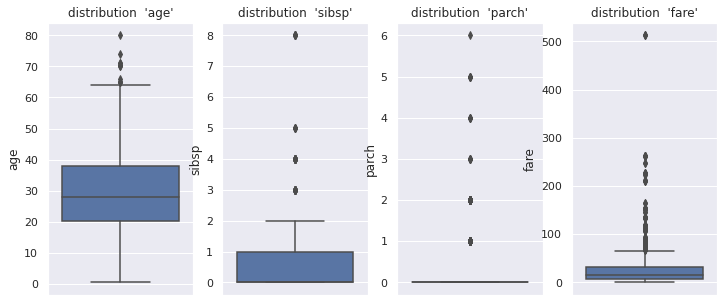

In [49]:
figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(12,5)

for i in range(4):
    col = numerical_cols[i]
    sns.boxplot(data=titanic_df, y=col, showfliers=True, ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{col}'")

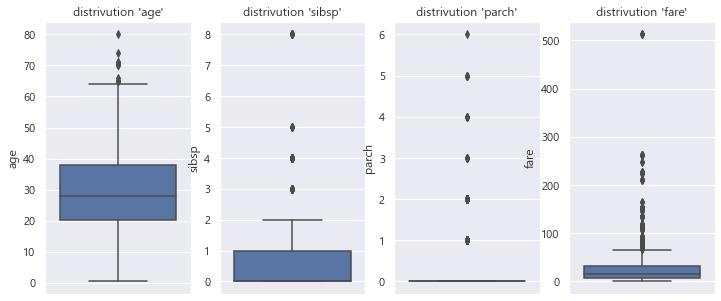

In [10]:
figure ,ax_list = plt.subplots(nrows = 1 , ncols  = 4)
figure.set_size_inches(12,5)

for i in range(4):
    col = numerical_cols[i]
    sns.boxplot(data=titanic_df, y = col, showfliers = True, ax = ax_list[i])
    ax_list[i].set_title(f"distrivution '{col}'")

범주형 컬럼들의 분포를 그려봅니다. 범주형이므로 countplot을 통해 각 범주별로 개수를 셀 수 있습니다.  
* 범주형 컬럼이 총 9개 이므로, 3x3 도화지 레이아웃으로 하나씩 그래프를 그려봅니다.
* ax_list_list는 [[], []] 형태의 2차원 리스트 입니다. for 문으로 반복하기 위해 1차원 리스트로 풀어줍니다.
* 1차원 리스트 ax_list가 9개의 도화지 (ax)를 갖도록 풀어서 할당하는데, `.reshape()` 라는 numpy 함수를 사용합니다.

(3, 3)
(9,)


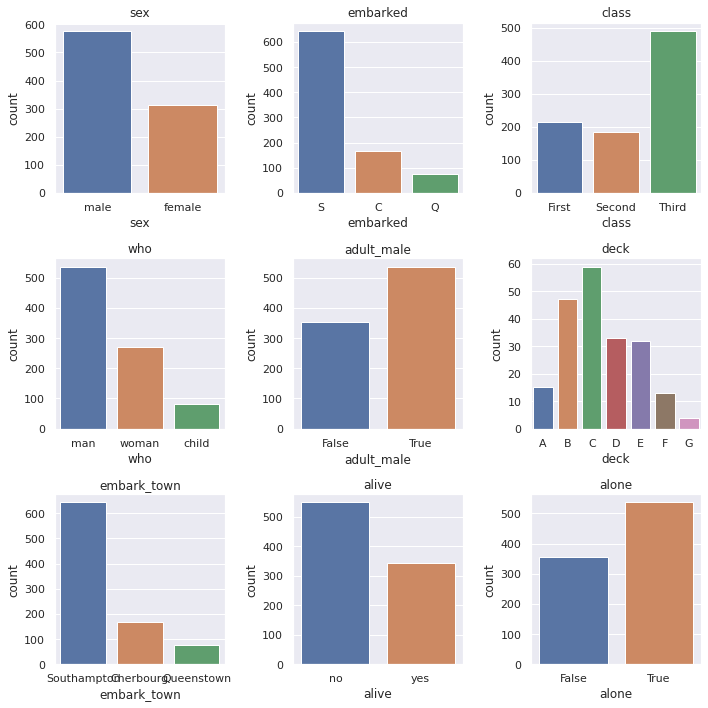

In [51]:
figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(10,10)

ax_list = ax_list_list.reshape(9)  # 다차원 행렬의 차원을 원하는 모양으로 변경합니다.
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=titanic_df, x=col, ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()

#### 데이터로부터 유의미한 정보 발굴하기  
사실, 여기서부터는 EDA의 범위를 넘어섭니다. 그래도 탑승객의 '생존'에 어떤 것들이 영향을 미치는지 궁금하시죠?  
몇 가지 가설을 세우고 그래프를 그려 '생존'에 영향을 미치는 요인이 무엇인지 살펴봅시다

##### 성별과 생존 여부

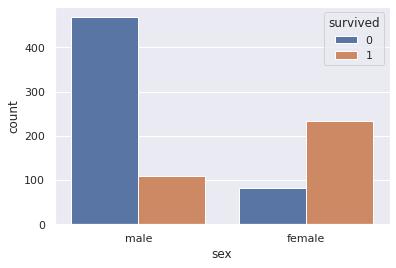

In [52]:
#유의한 정보 알아보기 
sns.countplot(data=titanic_df, x='sex', hue='survived');

##### 좌석 등급과 생존 여부

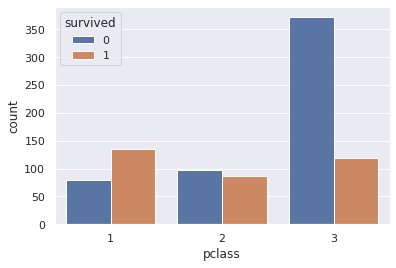

In [53]:
sns.countplot(data=titanic_df, x='pclass', hue='survived');

##### 9개의 범주형 분류에 대해, 생존 여부로 그래프 그리기

(3, 3)
(9,)


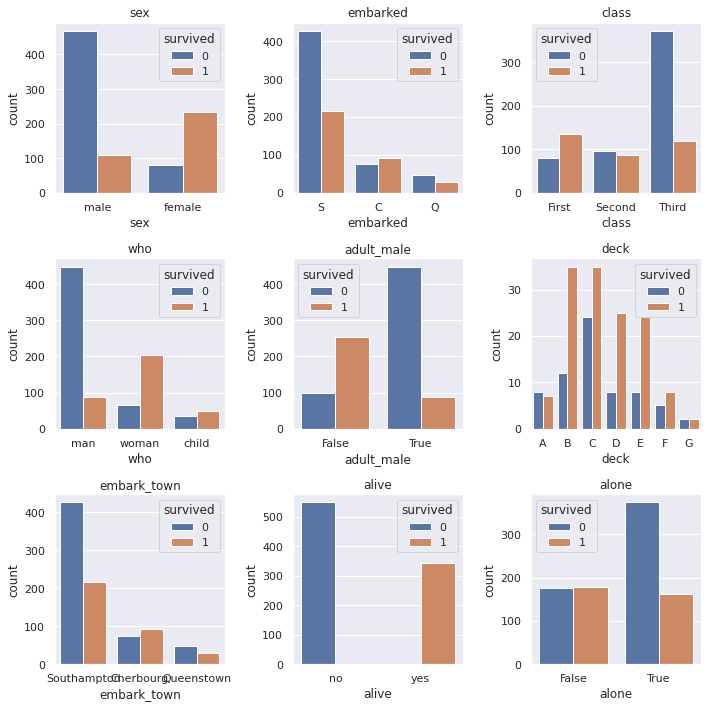

In [54]:
# hue 인자로 'survived' 컬럼을 입력, 각 분류형 데이터 별로 생존/사망 분리하여 살펴보기

figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(10,10)

ax_list = ax_list_list.reshape(9)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=titanic_df, x=col, ax=ax_list[i], hue='survived')
    ax_list[i].set_title(col)

plt.tight_layout()

- 남성보다 여성의 생존률이 더 높습니다  (남성 > 여성 > 아이)
- 탑승지(embarked)가 C인 경우 생존율이 높습니다
- 1등석 > 2등석 > 3등석 순으로 생존율이 높습니다
- B,D,E 덱 위치의 승객들이 생존율이 높습니다
- 나홀로 승객은 생존율이 낮습니다

##### 성별과 좌석 등급에 따라, 나이의 boxplot 그려보기

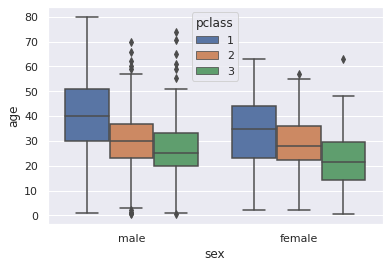

In [55]:
sns.boxplot(data=titanic_df, x='sex', y='age', hue='pclass');

##### 배우자+형제자매의 수, 생존 여부 별 나이의 boxplot

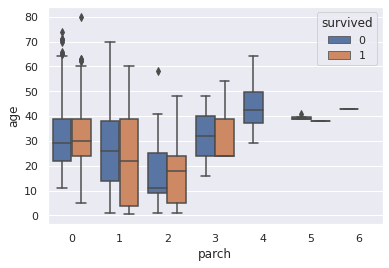

In [56]:
sns.boxplot(data=titanic_df, x="parch", y="age", hue='survived');

# 데이터 분석 결과를 통해 얻은 결론(인사이트)를 정리해봅시다.

In [39]:
# 직접 결론을 작성해보세요.
'''
1. 1 > 2 > 3 생존확률이 높다
2. 여자/어린이 > 남자 생존확률이 높다
'''

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [100]:
df = titanic_df
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,0,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,1,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,0,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,1,True


In [ ]:
df = pd.read_csv('train_and_test2.csv', usecols=[ #usecols = 사용하는것만 
  'Age', # 나이
  'Fare', # 승차 요금
  'Sex', # 성별
  'sibsp', # 타이타닉에 탑승한 형제자매, 배우자의 수
  'Parch', # 타이타니게 탑승한 부모, 자식의 수
  'Pclass', # 티켓 등급 (1, 2, 3등석)
  'Embarked', # 탑승국
  '2urvived' # 생존 여부 (0: 사망, 1: 생존)
])

df.head(5)

In [101]:
df = df[['age','fare','sex','sibsp','parch','pclass','embarked', 'alive']]
df.alive.shape

(891,)

In [102]:
df['alive']=df['alive'].replace({'yes':1, 'no':0})

<ipython-input-102-5dcb44af923a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alive']=df['alive'].replace({'yes':1, 'no':0})


In [97]:
def alive_change(x):
    if x=='yes':
        return 1
    else:
        return 0
    
df['alive'] = df['alive'].apply(lambda x : alive_change(x))


<ipython-input-97-b4d33a0745d6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alive'] = df['alive'].apply(lambda x : alive_change(x))


sex     alive
female  0         81
        1        233
male    0        468
        1        109
Name: sex, dtype: int64

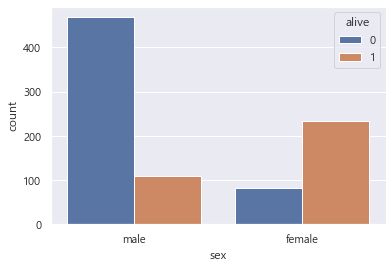

In [103]:
### 간단한 데이터셋 보기
sns.countplot(x= 'sex', hue = 'alive', data =df)
df.groupby(['sex','alive'])['sex'].count()

<AxesSubplot:xlabel='alive', ylabel='count'>

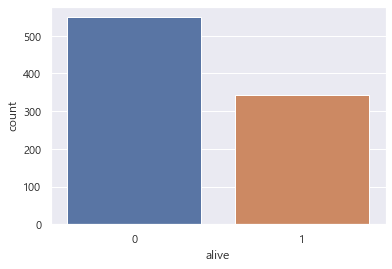

In [104]:
sns.countplot(x= df['alive'] )

## 전처리

In [105]:
#비어있는 행 확인 
df.isnull().sum()

age         177
fare          0
sex           0
sibsp         0
parch         0
pclass        0
embarked      2
alive         0
dtype: int64

In [106]:
df = df.dropna()

In [107]:
len(df)

712

In [108]:
df['sex']=df['sex'].replace({'male':1, 'female':0})

In [111]:
df['embarked'].unique()
df['embarked'] = df['embarked'].replace({'S':2,'C':1,'Q':0})

## X,y 데이터 분할

In [113]:
x_data = df.drop(columns = ['alive'], axis = 1)
x_data = x_data.astype(np.float32)
x_data.head(5)
x_data.shape

(712, 7)

In [114]:
y_data = df['alive']
y_data =y_data.astype(np.float32)
y_data.head(100)
y_data.shape

(712,)

## 표준화

In [115]:
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)
print(x_data.values[0])
print(x_data_scaled[0])

[22.    7.25  1.    1.    0.    3.    2.  ]
[-0.52766854 -0.5163799   0.7561375   0.52251077 -0.50678736  0.90859973
  0.5012257 ]


In [116]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size = 0.2)
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(569, 7) (143, 7)
(569,) (143,)


## Model 학습

In [118]:
model = Sequential([
    Dense(1, activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01),metrics = ['acc'])
model.fit(x_train,
         y_train,
         validation_data = (x_val,y_val),
         epochs = 100)

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 8.3866 - acc: 0.5905 - val_loss: 4.6142 - val_acc: 0.6154
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 2.6648 - acc: 0.6011 - val_loss: 0.8471 - val_acc: 0.4615
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.8868 - acc: 0.5255 - val_loss: 0.6336 - val_acc: 0.7063
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6769 - acc: 0.6678 - val_loss: 0.6512 - val_acc: 0.7203
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6199 - acc: 0.7100 - val_loss: 0.5778 - val_acc: 0.7483
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5932 - acc: 0.7258 - val_loss: 0.5493 - val_acc: 0.7483
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5803 - acc: 0.7258 - val_loss: 0.5951 - val_acc: 0.8042
Epoch 8/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5802 - a

18/18 [==============================] - 0s 1ms/step - loss: 0.4864 - acc: 0.7733 - val_loss: 0.4843 - val_acc: 0.7902
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4870 - acc: 0.7540 - val_loss: 0.4520 - val_acc: 0.8252
Epoch 65/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4980 - acc: 0.7715 - val_loss: 0.4555 - val_acc: 0.8182
Epoch 66/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4934 - acc: 0.7698 - val_loss: 0.4475 - val_acc: 0.8252
Epoch 67/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4840 - acc: 0.7856 - val_loss: 0.4784 - val_acc: 0.7902
Epoch 68/100
18/18 [==============================] - 0s 951us/step - loss: 0.4843 - acc: 0.7786 - val_loss: 0.4527 - val_acc: 0.8252
Epoch 69/100
18/18 [==============================] - 0s 941us/step - loss: 0.4808 - acc: 0.7803 - val_loss: 0.5444 - val_acc: 0.7762
Epoch 70/100
18/18 [==============================] - 0s 997us/step - loss: 0.4977 - 